In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math as m

# 此处是一个jupyter notebook的魔术命令，用于在Notebook中启用交互式的Matplotlib绘图
%matplotlib notebook

# 设置Matplotlib的全局参数，将动画的渲染方式设置为JavaScript HTML。
plt.rcParams['animation.html'] = 'jshtml'

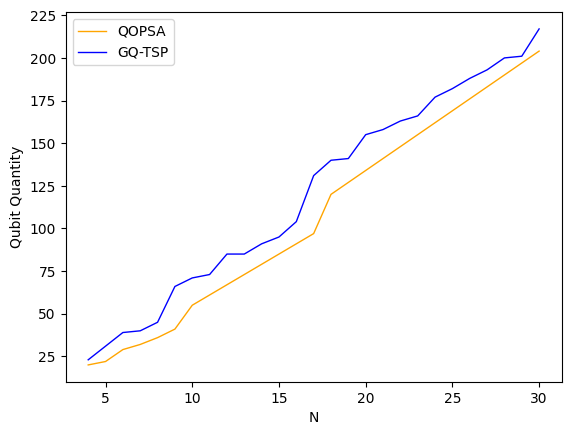

In [18]:
""" QOPSA算法和GQ-TSP算法的量子比特使用量的曲线图 此处比较的都是计算N个节点的哈密顿回路"""

# QOPSA: (N-1) * \lceil log(N-1) \rceil + max(N-1, 6) + 6 + 2
# GQ-TSP: N * \lceil logN \rceil + 2 \sqrt N logN + 

def find_divisors(n):
    num_divisor = 0
    for i in range(1, n):
        if n % i == 0:
            num_divisor += 1
    return num_divisor

p = 6

x = []
mine_y = []
others_y = []
N = 30
for i in range(4, N + 1):
    x.append(i)
    mine_y.append( (i - 1) * m.ceil(m.log2(i - 1)) + max(i - 1, p) + max(i - 3, p - 1) + 3 )

    # 求共需要几个寄存器来作为Location register和Anchor register
    n = m.ceil(m.log2(i))
    tmp_LR = 1000
    for k in range(1, i):
        tmp_LR = min(tmp_LR, m.floor(i / (k + 1)) + k)

    tmp_y = n * tmp_LR + n + find_divisors(i)
    if tmp_y < 13:
        tmp_y = 13
        
    others_y.append( i * n + tmp_y + 2 )
    if n > 2:
        others_y[i - 4] += n - 2

# print(mine_y)
# print(others_y)

%matplotlib inline

plt.plot(x, mine_y, linestyle='-', linewidth=1, color='orange', label='QOPSA')
plt.plot(x, others_y, linestyle='-', linewidth=1, color='blue', label='GQ-TSP')

plt.legend(['QOPSA', 'GQ-TSP'])
plt.xlabel('N')
plt.ylabel('Qubit Quantity')

plt.show()

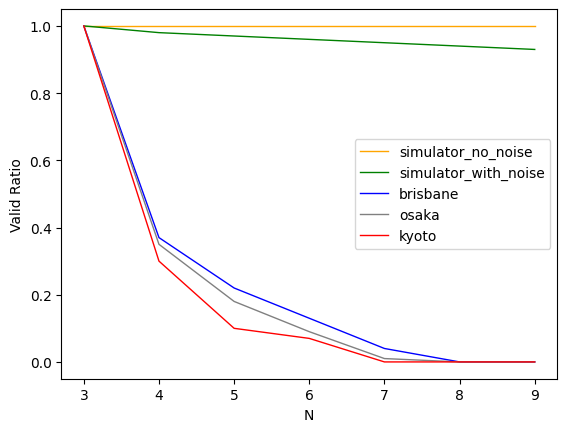

In [7]:
""" Valid Ratio """

x = [3, 4, 5, 6, 7, 8, 9]
simulator_no_noise = [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
simulator_with_noise = [1.00, 0.98, 0.94, 0.93, 0.93, 0.90, 0.87]
brisbane = [1.00, 0.37, 0.22, 0.13, 0.04, 0.00, 0.00]
osaka = [1.00, 0.35, 0.18, 0.09, 0.01, 0.00, 0.00]
kyoto = [1.00, 0.30, 0.10, 0.07, 0.00, 0.00, 0.00]

plt.plot(x, simulator_no_noise, linestyle='-', linewidth=1, color='orange', label='simulator_no_noise')
plt.plot(x, simulator_with_noise, linestyle='-', linewidth=1, color='green', label='simulator_with_noise')
plt.plot(x, brisbane, linestyle='-', linewidth=1, color='blue', label='brisbane')
plt.plot(x, osaka, linestyle='-', linewidth=1, color='grey', label='osaka')
plt.plot(x, kyoto, linestyle='-', linewidth=1, color='red', label='kyoto')

plt.legend(['simulator_no_noise', 'simulator_with_noise', 'brisbane', 'osaka', 'kyoto'])
plt.xlabel('N')
plt.ylabel('Valid Ratio')

plt.show()

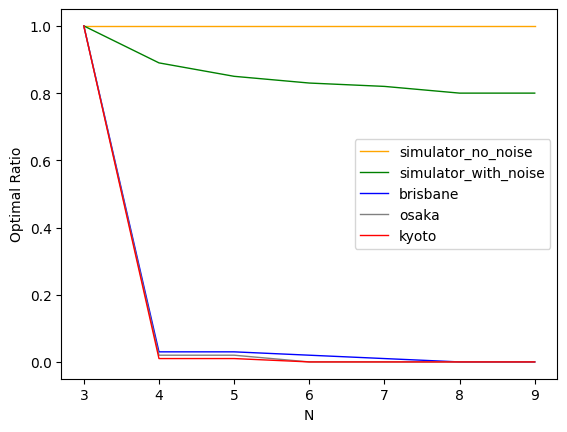

In [9]:
""" Optimal Ratio """

x = [3, 4, 5, 6, 7, 8, 9]
simulator_no_noise = [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
simulator_with_noise = [1.00, 0.89, 0.85, 0.83, 0.82, 0.80, 0.80]
brisbane = [1.00, 0.03, 0.03, 0.02, 0.01, 0.00, 0.00]
osaka = [1.00, 0.02, 0.02, 0.00, 0.00, 0.00, 0.00]
kyoto = [1.00, 0.01, 0.01, 0.00, 0.00, 0.00, 0.00]

plt.plot(x, simulator_no_noise, linestyle='-', linewidth=1, color='orange', label='simulator_no_noise')
plt.plot(x, simulator_with_noise, linestyle='-', linewidth=1, color='green', label='simulator_with_noise')
plt.plot(x, brisbane, linestyle='-', linewidth=1, color='blue', label='brisbane')
plt.plot(x, osaka, linestyle='-', linewidth=1, color='grey', label='osaka')
plt.plot(x, kyoto, linestyle='-', linewidth=1, color='red', label='kyoto')

plt.legend(['simulator_no_noise', 'simulator_with_noise', 'brisbane', 'osaka', 'kyoto'])
plt.xlabel('N')
plt.ylabel('Optimal Ratio')

plt.show()

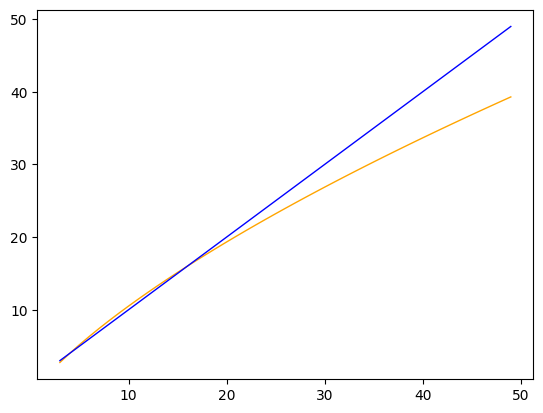

In [22]:
x = []
sqrt_log = []
y = []

for i in range(3, 50):
    x.append(i)
    y.append(i)
    sqrt_log.append(m.sqrt(i) * m.log2(i) )

plt.plot(x, sqrt_log, linestyle='-', linewidth=1, color='orange', label='simulator_no_noise')
plt.plot(x, y, linestyle='-', linewidth=1, color='blue', label='simulator_no_noise')
plt.show()

In [17]:
for i in range(len(y)):
    if sqrt_log[i] == y[i]:
        print(i, y[i])